**Análise**

Os blocos de interesse escolhidos para essa análise são: o NAFTA, que foi criado para eliminar barreiras alfandegárias entre os paises norte americanos; e o Mercosul, que foi criado para estabelecer uma zona de livre comércio entre países vizinhos. 

Para analizarmos esses países integrantes, decidimos olhar a sua taxa de desemprego atual, comparada ao mesmo valor de quando bloco foi formado, para verificar se houve uma evolução. Adicionalmente olhamos esses dados do país em tods os anos comparada a uma media mundial, para remover a possibilidade de um pais ser considerado "avançado" sendo que o mundo como um todo avançou.

As duas teorias atuas que nós acreditamos são: os países se beneficiaram por se juntar ao grupo e portanto foram considerados, em maior parte, "avançado" no teste; Por outro lado, os integrantes podem não ter sofrido diferença significante para ser considerado uma opção benéfica, e que os blocos não tem impacto.

A partir de nossos dados e pesquisas, é possivel dizer que grande parte dos países se beneficiou desses acordos e pode avançar no indicador escolhido (desemprego). 

Em relação ao nosso sistema classificador, a acurácia foi de 100%. O resultado de todos os países que passaram por ele coincide com os dados apresentados no gráfico e na tabela 'jobs.csv'.


<Figure size 432x288 with 0 Axes>

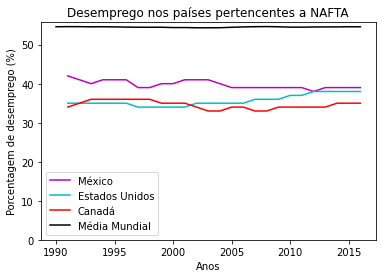

<Figure size 432x288 with 0 Axes>

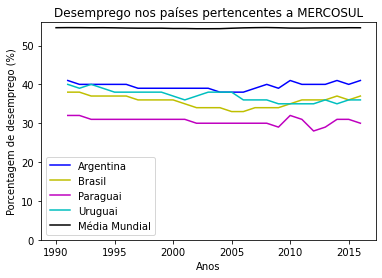

In [3]:
# APS3

from textwrap import indent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ----------------------------------- #

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

plt.style.use('default')

# ----------------------------------- #

world_mean = []
world_mean_years = []
for column_name in list(df.columns.values):
    if '[YR' in column_name:
        world_mean_years.append(int(float(column_name[0:5])))
        column = df[column_name]
        column = column.astype(float)
        newMean = column.mean()
        world_mean.append(newMean)

# ----------------------------------- #

plt.figure()
fig, ax = plt.subplots()
nafta = [
    # TDOD: coloque os df.iloc[numero] aqui
    df.iloc[143], #mexico
    df.iloc[229], #usa
    df.iloc[36], #canada
]

colors = ['r', 'g', 'b', 'c', 'y', 'm']
colors_dotted = ['r--', 'g--', 'b--', 'c--', 'y--', 'm--']
for paises in nafta:
    
    anos = []
    dados = []
    i=0
    for ano in paises.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            dados.append(100-int(float(paises[ano])))
        i+=1

    # para terem cores diferentes, e tracejado case precise de mais
    if len(colors) != 0:
        chosen = random.randint(0, len(colors) - 1)
        ax.plot(anos, dados, colors[chosen])
        del colors[chosen]
    else:
        chosen = random.randint(0, len(colors_dotted) - 1)
        ax.plot(anos, dados, colors_dotted[chosen])
        del colors_dotted[chosen]

ax.plot(world_mean_years, world_mean, 'k')
ax.legend(['México', 'Estados Unidos', 'Canadá', 'Média Mundial'])
plt.yticks(range(0, 60, 10))
plt.title('Desemprego nos países pertencentes a NAFTA')
plt.xlabel('Anos')
plt.ylabel('Porcentagem de desemprego (%)')
plt.show()

# ----------------------------------- #

plt.figure()
fig, ax = plt.subplots()
mercosul = [
    # TDOD: coloque os df.iloc[numero] aqui
    df.iloc[8], #argentina
    df.iloc[27], #brasil
    df.iloc[173], #paraguai
    df.iloc[231] #uruguai
]

colors = ['r', 'g', 'b', 'c', 'y', 'm']
colors_dotted = ['r--', 'g--', 'b--', 'c--', 'y--', 'm--']
for paises in mercosul:
    
    anos = []
    dados = []
    i=0
    for ano in paises.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            dados.append(100-int(float(paises[ano])))
        i+=1

    # para terem cores diferentes, e tracejado case precise de mais
    if len(colors) != 0:
        chosen = random.randint(0, len(colors) - 1)
        ax.plot(anos, dados, colors[chosen])
        del colors[chosen]
    else:
        chosen = random.randint(0, len(colors_dotted) - 1)
        ax.plot(anos, dados, colors_dotted[chosen])
        del colors_dotted[chosen]

ax.plot(world_mean_years, world_mean, 'k')
ax.legend(['Argentina', 'Brasil', 'Paraguai', 'Uruguai', 'Média Mundial'])
plt.yticks(range(0, 60, 10))
plt.title('Desemprego nos países pertencentes a MERCOSUL')
plt.xlabel('Anos')
plt.ylabel('Porcentagem de desemprego (%)')
plt.show()

Classificação - atrasados e avançados:

**classificados levando em conta os dados da época que o grupo foi criado e o momento atual. Se havia uma taxa menor quando o grupo foi criado e hoje ela se encontra maior, ele é considerado atrasado. Do contrário, é considerado como avançado.

NAFTA:
México: avançado
Estados Unidos: atrasado
Canadá: avançado

Mercosul:
Argentina: avançado
Uruguai: avançado
Brasil: avançado
Paraguai: avançado



In [14]:
#######Probabilidade do país ser avançado:

#NAFTA:

p_avancado_n = (3 /2 * 3)/2

#Mercosul:

p_avancado_m = (4 / 4 * 4)/4

print (p_avancado_n, p_avancado_m)

#######Bayesianos para cada bloco:

#NAFTA:

bayes_n = (2/3 * 3)/2

#Mercosul:

bayes_m = (4 * 4)/4

print(bayes_n, bayes_m)

2.25 1.0
1.0 4.0


In [12]:
#sistema classificador:

mercosul = [27, 173, 231, 8]

for i in mercosul:
    name = df.iloc[i]['Country Name']
    if df.iloc[i]['1991 [YR1991]'] < df.iloc[i]['2016 [YR2016]']:
        print (f'{name} avançado')
    else:
        print (f'{name} atrasado')

nafta = [36, 143, 229]
print()

for i in nafta:
    name = df.iloc[i]['Country Name']
    if df.iloc[i]['1994 [YR1994]'] < df.iloc[i]['2016 [YR2016]']:
        print (f'{name} avançado')
    else:
        print (f'{name} atrasado')



Brazil avançado
Paraguay avançado
Uruguay avançado
Argentina avançado

Canada avançado
Mexico avançado
United States atrasado


**Review da APS2**

Feedback: 
- Que país é AdS? 
- No texto, existe um raciocínio tendendo ao circular: "a correlaçao mostra que nossa hipótese não se aplica, mas mesmo assim nem tanto". 
- De fato, há uma correlação muito baixa entre os fenômenos que vocês observaram para os três países, mas talvez isso esteja ligado ao fato de que há poucos adolescentes fora da escola nos três casos (o índice chega perto de zero). De qualquer maneira, de fato, parece que o índice de desemprego não está diretamente ligado à falta de presença na escola, o que é um dado bastante importante - só porque um país tem escola, não significa que ele necessariamente tem emprego, o que significa que a taxa de empregos está ligada a outras questões que não são necessariamente a escolaridade. 
- Faltaram as correções do APS anterior. 
- Os anos no gráfico estão estranhos - por que eles começam só na metade do gráfico?
- No arquivo entregue não está descrito qual é o indicador que está sendo comparado com "Adolescents out of school". O título do gráfico mostra a comparação entre adolescentes fora da escola e porcentagem de trabalhadores, mas não é claro o que significa "porcentagem de trabalhadores".

**APS2: com feedback**

O novo indicador, utilizado para comparação com o "Porcentagem de pessoas desempregadas", é o "Adolescentes fora da escola". Pensamos em duas principais hipóteses: a falta de instrução formal de um adolescente pode causar mais dificuldade para entrar no mercado de trabalho; por outro lado, alguns param seus estudos justamente para adentrar o mercado de trabalho mais cedo e ganham mais oportunidades.

Entretanto, levando em conta o gráfico e as suas tendencias, essas hipóteses não se confirmam. Adicionalmente, a falta de relação explícita entre os dois indicadores é reforçada pelas taxas de correlação de numeros sendo próximas de zero para todos os países. Portanto, é possivel afirmar que os adolecentes que saem da escola não são afetados em sua abilidade de conseguir entrar no mercado de trabalho futuramente.

<Figure size 640x480 with 0 Axes>

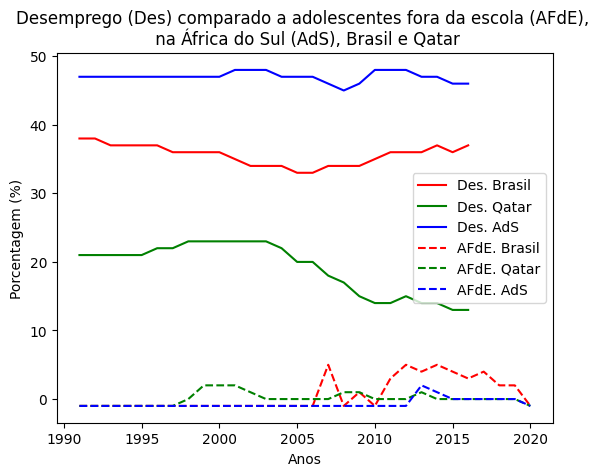

Correlação Brasil: -0.03485446912035962
Correlação Qatar: 0.11405506745318336
Correlação África do Sul: 0.1495722778410477


In [6]:
# APS2 - Review

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------- #

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

df2 = pd.read_csv('csv/adolescent.csv', sep=',', encoding='latin1', decimal='.')
df2 = df2.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df2 = df2.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

plt.style.use('default')
plt.figure()
fig, ax = plt.subplots()

# ----------------------------------- #

anosBrasil = df.iloc[27]
anosTop = df.iloc[179]
anosBottom = df.iloc[197]
r = 0
for areas in [anosBrasil, anosTop, anosBottom]:
    
    anos = []
    data = []
    i=0
    for ano in areas.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            data.append(100-int(float(areas[ano])))
        i+=1

    # para terem linhas diferentes
    if r == 0:
        ax.plot(anos, data, 'r')
    elif r == 1:
        ax.plot(anos, data, 'g')
    else:
        ax.plot(anos, data, 'b')
    r+=1

# ----------------------------------- #

anosBrasil = df2.iloc[27]
anosTop = df2.iloc[179]
anosBottom = df2.iloc[197]
r=0
for areas in [anosBrasil, anosTop, anosBottom]:

    anos = []
    data = []
    i=0
    for ano in areas.index:
        if i >= 2:
            anos.append(int(float(ano[0:5])))
            data.append(int(float(areas[ano])))
        i+=1

    # para terem linhas diferentes
    if r == 0:
        ax.plot(anos, data, 'r--')
    elif r == 1:
        ax.plot(anos, data, 'g--')
    else:
        ax.plot(anos, data, 'b--')
    r+=1

# ----------------------------------- #

ax.legend(["Des. Brasil", "Des. Qatar", 'Des. AdS', "AFdE. Brasil", "AFdE. Qatar", 'AFdE. AdS'])
plt.yticks(range(0, 60, 10))
plt.title('Desemprego (Des) comparado a adolescentes fora da escola (AFdE), \n na África do Sul (AdS), Brasil e Qatar')
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.show()

# ----------------------------------- #

def calcula_correlacao(df_trabalho, df_adol):
    lista_trabalho = list(df_trabalho)
    lista_adol = list(df_adol)
    lista_float_trab = []
    lista_float_adol = []
    del lista_trabalho[0]
    del lista_adol[0]
    for str in lista_trabalho:
        lista_float_trab.append(float(str))
    for str in lista_adol:
        lista_float_adol.append(float(str))
    serie_trab = pd.Series(lista_float_trab)
    serie_adol = pd.Series(lista_float_adol)
    correlacao = serie_trab.corr(serie_adol)
    return correlacao

corr = calcula_correlacao(df.iloc[27], df2.iloc[27])
print(f'Correlação Brasil: {corr}')

corr = calcula_correlacao(df.iloc[179], df2.iloc[179])
print(f'Correlação Qatar: {corr}')

corr = calcula_correlacao(df.iloc[197], df2.iloc[197])
print(f'Correlação África do Sul: {corr}')
